# Pandas的進階操作
在日常的資料處理中，經常會對一個DataFrame進行逐行 (column)、逐列 (row)和逐元素 (element)的操作。
對應這些操作，Pandas中的函數可以解決絕大部分這樣的資料處理需求。以下分別介紹：
* `map`
* `apply`
* `applymap`

演示的資料集如下：

In [2]:
import numpy as np
import pandas as pd
boolean = [True, False]
gender = ["男", "女"]
color = ["white", "black", "yellow"]
data = pd.DataFrame({
    "height": np.random.randint(150, 190, 100),
    "weight": np.random.randint(40, 90, 100),
    "smoker": [boolean[x] for x in np.random.randint(0, 2, 100)],
    "gender": [gender[x] for x in np.random.randint(0, 2, 100)],
    "age": np.random.randint(15, 90, 100),
    "color": [color[x] for x in np.random.randint(0, len(color), 100)]
}
)
data.head()

,height,weight,smoker,gender,age,color
0,150,77,False,男,66,black
1,172,45,True,女,41,black
2,170,61,True,男,53,yellow
3,189,85,False,女,39,white
4,156,54,False,女,76,white


## `map()`
Pandas中的map()方法可以將一個函數映射到數據集的每一個元素上。  
該方法接受一個函數作為參數，這個函數可以是一個lambda函數，也可以是一個自定義的函數。  
map()方法返回一個新的Series對象，其中包含了映射後的值。  
假設我們需要把資料集中gender列的男替換為1，女替換為0：

In [3]:
#使用字典進行映射
map_series = data['gender'].map({'男':1, '女':0})
map_series.iloc[0:5]

0    1
1    0
2    1
3    0
4    0
Name: gender, dtype: int64

In [4]:
#使用函數
def map_gender(x):
    if x=='男':
        return 1
    elif x=='女':
        return 0

map_series = data['gender'].map(map_gender) #input function directly, without brackets.
map_series.iloc[0:5]
#replace
data['gender'] = map_series
data.head()

,height,weight,smoker,gender,age,color
0,150,77,False,1,66,black
1,172,45,True,0,41,black
2,170,61,True,1,53,yellow
3,189,85,False,0,39,white
4,156,54,False,0,76,white


`Seires.map()`圖解
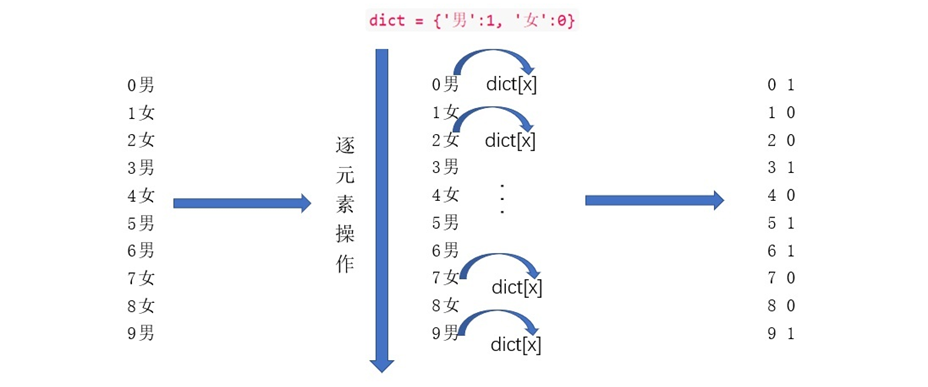
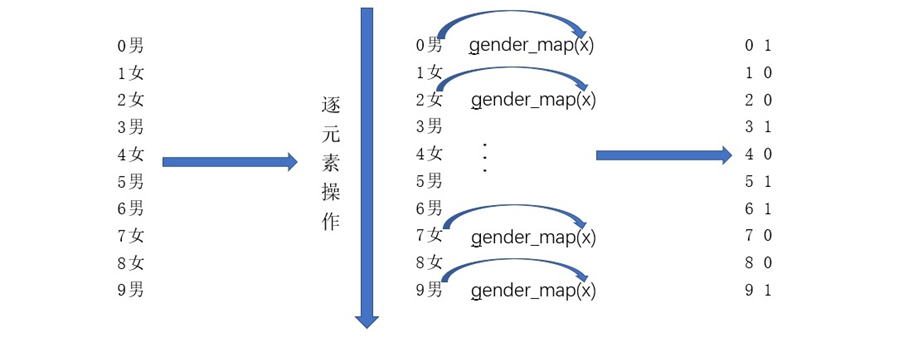

## `apply`
`apply`可以讓我們對 DataFrame 或 Series 中的每個元素進行自定義的函數操作。這個方法的使用方式類似於map()方法，不同的是，apply()方法可以應用於整個 DataFrame 或 Series，而不僅僅是一個元素。  
使用 `apply()` 方法，可以將一個自定義的函數應用於一個 DataFrame 或 Series 的每一行或每一列，或者應用於整個 DataFrame 或 Series。通常情況下，`apply()`方法的參數是一個函數，這個函數可以是一個 lambda 函數，也可以是一個自定義的函數。  
如果想要對 DataFrame 的每一行或每一列進行操作，可以使用`apply()`方法配合 axis 參數來實現。 axis 參數的取值可以是 0 或 1，其中 0 表示按列操作， 1 表示按行操作。默認情況下， apply() 方法是按列操作的。

pandas 的 apply 函數是一個可以套用在資料框、系列或分組物件上的方法，可以將自定義的函數應用到資料中的每一行或每一個元素。apply 函數有三個參數，分別是：
- func：需要應用的函數，可以是內建函數、lambda 函數或自定義函數。
- axis：表示應用函數的方向，axis=0 時按列應用函數，axis=1 時按行應用函數。
- args：是一個可選的元組，包含傳遞給函數的其他參數。

使用 apply 函數可以對資料進行各種處理，例如計算統計量、進行數據清理和轉換等操作。
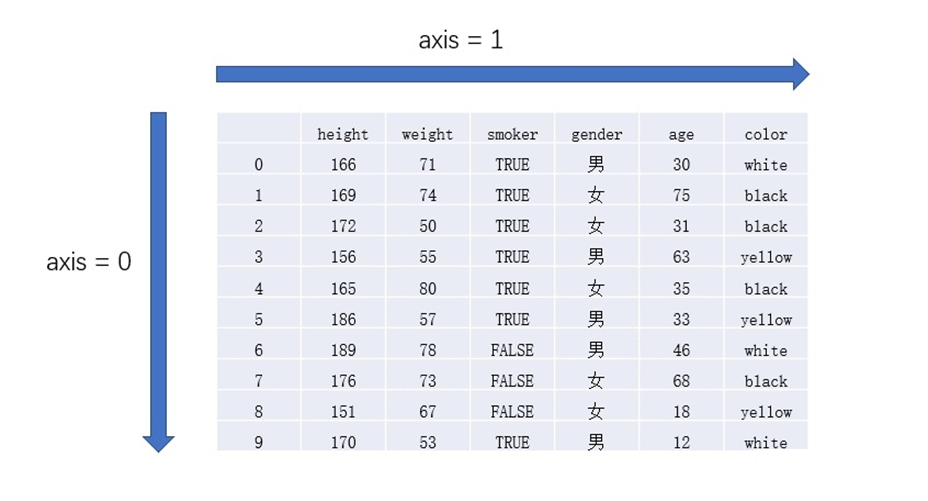

假設在資料統計的過程中，年齡age列有較大誤差，需要對其進行調整（加上或減去一個值），由於這個加上或減去的值未知，故在定義函數時，需要加多一個參數bias，此時用map方法是操作不了的（傳入map的函數只能接收一個參數）。


In [109]:
def apply_age(x, bias):
    return x + bias

In [111]:
series_1 = data['age'].apply(apply_age, args=(3,))
series_1

0     88
1     71
2     38
3     87
4     19
      ..
95    84
96    69
97    59
98    84
99    33
Name: age, Length: 100, dtype: int64

假設現在需要對data中的數值列分別進行取對數和求和的操作，這時可以用apply進行相應的操作，因為是對列進行操作，所以需要指定axis=0。

In [114]:
result1 = data[['height','weight']].apply(np.sum, axis=0)
result1

height    17105
weight     6516
dtype: int64

當沿著軸0（axis=0）進行操作時，會將各行 (columns)默認以Series的形式作為參數，傳入到你指定的操作函數中，操作後合併並返回相應的結果。

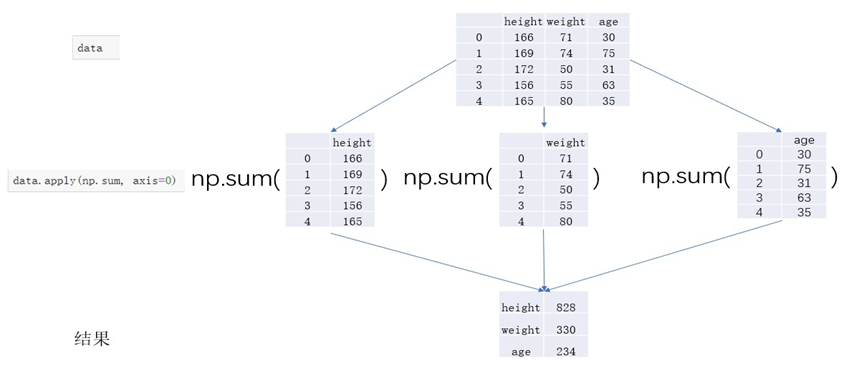

在資料集中，有身高和體重的資料，所以根據這個，我們可以計算每個人的BMI指數，計算公式是：`體重指數BMI=體重/身高的平方（kg/㎡）`，因為需要對每個樣本進行操作，這裡使用axis=1的apply進行操作：

In [115]:
def BMI(x):
    return x["weight"] / (x["height"] / 100) ** 2

In [116]:
result = data.apply(BMI, axis=1)
result.head()

0    26.287807
1    18.827160
2    13.406109
3    13.437248
4    22.222222
dtype: float64

當apply設置了axis=1對行進行操作時，會預設將每一列 (row)資料以Series的形式（Series的索引為列名）傳入指定函數，返回相應的結果。
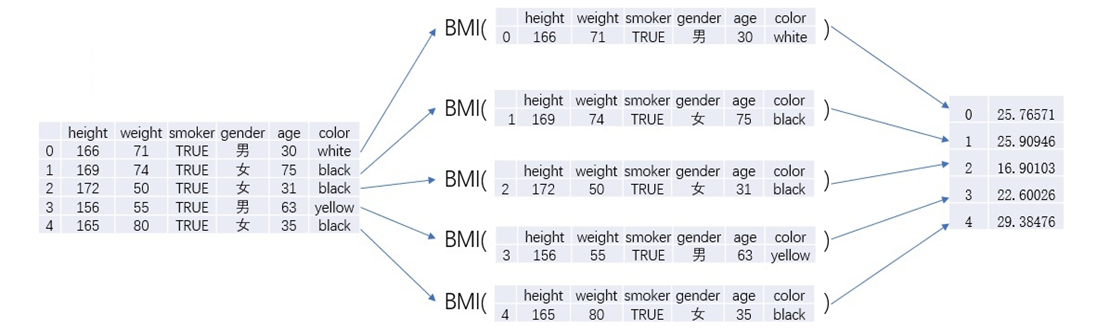

## `applymap`
applymap，會對DataFrame中的每個儲存格執行指定函數的操作。
現在想將DataFrame中所有的值保留兩位元小數顯示，使用applymap可以很快達到你想要的目的：

In [118]:
df = pd.DataFrame(
    {
        "A":np.random.randn(5),
        "B":np.random.randn(5),
        "C":np.random.randn(5),
        "D":np.random.randn(5),
        "E":np.random.randn(5),
    }
)
df.head()

,A,B,C,D,E
0,-0.274797,-0.509651,-1.481022,0.974472,0.345351
1,0.216452,0.993993,0.076989,0.112977,1.573539
2,-2.426234,0.310290,0.294992,0.499669,0.231992
3,-1.504317,-0.343425,-0.187187,-0.435591,-0.550369
4,1.210554,0.382644,-0.844956,0.492299,-0.190133


In [119]:
df.applymap(lambda x: float(f'{x:4.2f}'))

,A,B,C,D,E
0,-0.27,-0.51,-1.48,0.97,0.35
1,0.22,0.99,0.08,0.11,1.57
2,-2.43,0.31,0.29,0.50,0.23
3,-1.50,-0.34,-0.19,-0.44,-0.55
4,1.21,0.38,-0.84,0.49,-0.19


# Pandas.Dataframe.groupby
`groupby`:在日常的資料分析中，經常需要將資料根據某個（多個）欄位劃分為不同的群體（group）進行分析。如電商領域將全國的總銷售額根據省份進行劃分，分析各省銷售額的變化情況，社交領域將使用者根據畫像（性別、年齡）進行細分，研究使用者的使用情況和偏好等。  
在Pandas中，上述的資料處理操作可運用`groupby`完成

In [88]:
import pandas as pd

company = ["A", "B", "C"]

data = pd.DataFrame({
    "company": [company[x] for x in np.random.randint(0, len(company), 10)],
    "salary": np.random.randint(5, 50, 10),
    "age": np.random.randint(15, 50, 10)})

data.head()

,company,salary,age
0,C,12,17
1,A,45,48
2,A,41,49
3,C,5,41
4,C,11,21


## 常用的參數
* by: 用於指定分組依據的列名或列名列表；
* level: 用於指定索引中的層級來進行分組；
* axis: 用於指定按行或按列進行分組，預設值為0，即按行進行分組；
* sort: 用於指定是否按照分組依據的列進行排序，預設值為True；
* group_keys: 用於指定是否將分組依據的列作為索引，預設值為True；
* as_index: 用於指定是否將分組依據的列作為索引，預設值為True；
* squeeze: 用於指定對於單一列分組的時候是否返回Series類型，預設值為True。

在這裡，將上面的資料集按照company欄位進行劃分  
我們會得到一個DataFrameGroupBy物件

In [32]:
data_groups = data.groupby(['company'])
data_groups

觀察groups的內容
groupby的過程就是將原有的DataFrame按照groupby的欄位（這裡是company），劃分為若干個分組DataFrame，被分為多少個組就有多少個分組DataFrame。所以說，在groupby之後的一系列操作（如agg、apply等），均是基於子DataFrame的操作。

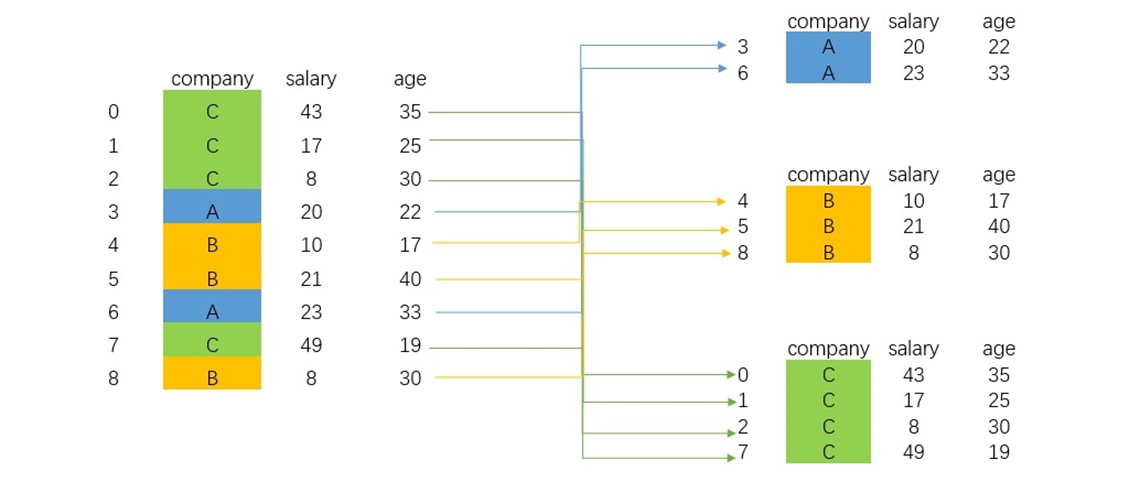

若要使用pandas的groupby函式以兩個columns進行分組，可以將這兩個columns名稱以list的形式傳入groupby函式中，

若要查看 groupby 函數分組後的各個組內容，可以直接進行該`DataFrameGroupBy`的迭代和`get_group()`函數。

In [36]:
for name, group in data_groups:
    print(name)
    print(group)
print()

A
  company  salary  age
0       A      11   42
4       A      43   29
B
  company  salary  age
1       B      24   48
2       B      29   40
3       B      41   16
5       B      29   16
9       B      12   49
C
  company  salary  age
6       C      35   39
7       C      30   23
8       C      29   46



In [37]:
##查看特定分組的get_group()
print(data_groups.get_group('A'))

  company  salary  age
0       A      11   42
4       A      43   29


## groups的運算和聚合函數`agg()`
groupby函數還支持多種聚合操作，包括 min, max , median , sum, quantile, std, var, size, count 等，也可以自定義聚合函數。

In [54]:
print(data_groups.min())
print(data_groups.median())

         salary  age
company             
A            11   29
B            12   16
C            29   23
         salary   age
company              
A          27.0  35.5
B          29.0  40.0
C          30.0  39.0


In [52]:
data_groups.describe()

salary                                                       age  \
         count       mean        std   min   25%   50%   75%   max count   
company                                                                    
A          2.0  27.000000  22.627417  11.0  19.0  27.0  35.0  43.0   2.0   
B          5.0  27.000000  10.464225  12.0  24.0  29.0  29.0  41.0   5.0   
C          3.0  31.333333   3.214550  29.0  29.5  30.0  32.5  35.0   3.0   

                                                          
         mean        std   min    25%   50%    75%   max  
company                                                   
A        35.5   9.192388  29.0  32.25  35.5  38.75  42.0  
B        33.8  16.619266  16.0  16.00  40.0  48.00  49.0  
C        36.0  11.789826  23.0  31.00  39.0  42.50  46.0

如果想求不同公司員工的平均年齡和平均薪水，可以按照下方的code進行:

In [56]:
data_groups.agg('mean')

,salary,age
company,,
A,27.000000,35.5
B,27.000000,33.8
C,31.333333,36.0


聚合函數`agg()`
針對樣例資料集，如果想求不同公司員工的平均年齡和平均薪水，可以按照下方的code進行：

In [55]:
data.groupby("company").agg({'salary': 'median', 'age': 'mean'})

,salary,age
company,,
A,27.0,35.5
B,29.0,33.8
C,30.0,36.0


亦可使用自訂function進行agg的聚合操作

In [59]:
def my_func(x):
    return np.mean(x) - np.std(x)

data.groupby('company').agg(my_func)

,salary,age
company,,
A,11.000000,29.000000
B,17.640513,18.935277
C,28.708664,26.373647


## `transform`
`transform` 方法允許我們對分組後的資料進行元素級的轉換。**具體來說，`transform` 方法將接受一個函式，然後將該函式應用於每個分組的資料，最終返回與原始資料的形狀相同的新資料。**  
也常用於`fillna`的依據不同群組的補值。

若現在需要在原資料集中新增一列avg_salary，代表員工所在的公司的平均薪水（相同公司的員工具有一樣的平均薪水）。如果按照正常的步驟來計算，需要先求得不同公司的平均薪水，然後按照員工和公司的對應關係填充到對應的位置

In [72]:
mean_salary_dict = data.groupby('company')['salary'].mean().to_dict()
mean_salary_dict

{'A': 22.0, 'B': 32.666666666666664, 'C': 31.0}

In [73]:
mean_salary_series = data['company'].map(mean_salary_dict)
mean_salary_series

0    22.000000
1    22.000000
2    22.000000
3    22.000000
4    32.666667
5    32.666667
6    22.000000
7    22.000000
8    31.000000
9    32.666667
Name: company, dtype: float64

In [74]:
data['mean_salary'] = mean_salary_series
data.head()

,company,salary,age,mean_salary
0,A,39,42,22.000000
1,A,5,18,22.000000
2,A,27,21,22.000000
3,A,9,38,22.000000
4,B,14,40,32.666667


如果使用transform的話，僅需要一行代碼

In [76]:
data['mean_salary_2'] = data.groupby('company')['salary'].transform('mean')
data.head()

,company,salary,age,mean_salary,mean_salary_2
0,A,39,42,22.000000,22.000000
1,A,5,18,22.000000,22.000000
2,A,27,21,22.000000,22.000000
3,A,9,38,22.000000,22.000000
4,B,14,40,32.666667,32.666667


並以下圖分解聚合之

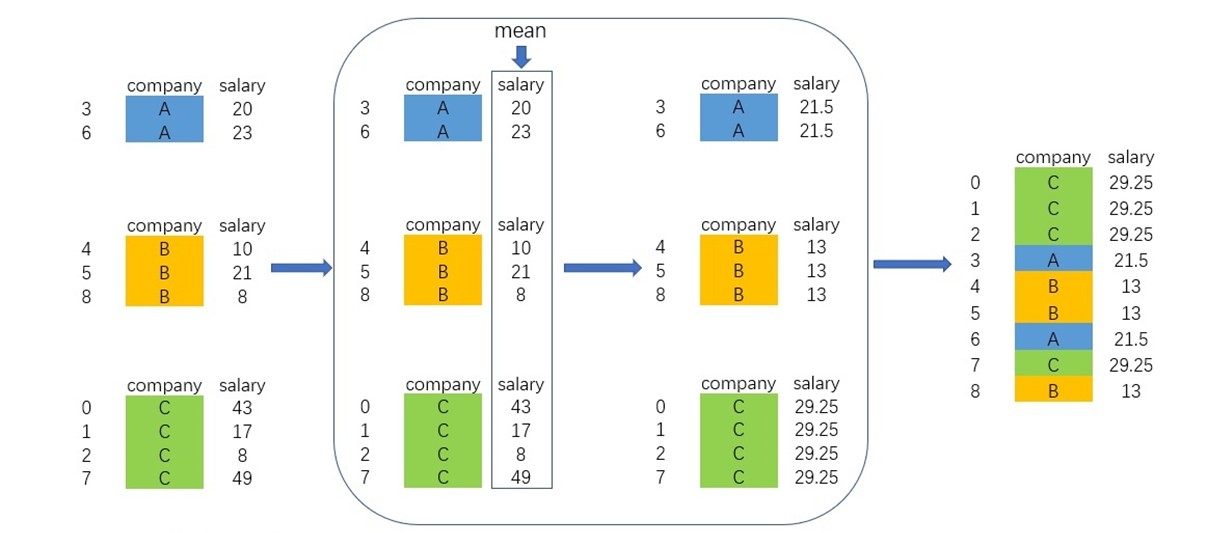

## An example of `fillna` by `transform`
`fillna`可填入一整個series，transform() 方法則可以對 DataFrame 或 Series 中的資料進行分組計算。如果要根據分組計算結果填充缺失值，可以將 fillna() 方法與 transform() 方法組合使用。

In [15]:
import pandas as pd
import numpy as np

# 創建一個包含 NaN 值的 DataFrame
df_fillna_trans = pd.DataFrame({'Group': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'B'],
                   'Value': [1, np.nan, 3, np.nan, np.nan, 6, 7, np.nan, np.nan, 10]})
print(df_fillna_trans)

  Group  Value
0     A    1.0
1     B    NaN
2     A    3.0
3     B    NaN
4     A    NaN
5     B    6.0
6     A    7.0
7     A    NaN
8     B    NaN
9     B   10.0


In [16]:
mean_transform = df_fillna_trans.groupby('Group')['Value'].transform('mean')
df_fillna_trans['Value'] = df_fillna_trans['Value'].fillna(value=mean_transform)
df_fillna_trans

,Group,Value
0,A,1.000000
1,B,8.000000
2,A,3.000000
3,B,8.000000
4,A,3.666667
5,B,6.000000
6,A,7.000000
7,A,3.666667
8,B,8.000000
9,B,10.000000


In [17]:
# 對 Value 列進行分組計算並填充缺失值
df_fillna_trans['Value'] = df_fillna_trans.groupby('Group')['Value'].transform(lambda x: x.fillna(x.mean()))

# 列印處理後的 DataFrame
df_fillna_trans

,Group,Value
0,A,1.000000
1,B,8.000000
2,A,3.000000
3,B,8.000000
4,A,3.666667
5,B,6.000000
6,A,7.000000
7,A,3.666667
8,B,8.000000
9,B,10.000000


## `groupby.apply`
對於groupby後的apply，以分組後的子DataFrame作為參數傳入指定函數的，基本操作單位是DataFrame，而之前介紹的apply的基本操作單位是Series。  
假設我現在需要獲取各個公司年齡最大的員工的資料：

In [95]:
def get_oldest_staff(x):
    #print(x)
    df = x.sort_values(by='age', ascending=True)
    return df.iloc[-1, :]

In [96]:
oldest_staff = data.groupby('company').apply(get_oldest_staff)
oldest_staff

,company,salary,age
company,,,
A,A,41,49
B,B,36,47
C,C,5,41


一樣使用圖解探討本範例:
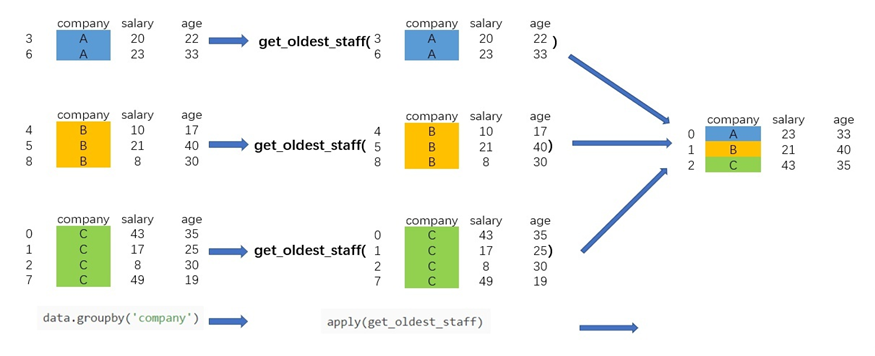

## summary
`apply`的靈活性最高，但`apply`的運行效率會比`agg`和`transform`更慢，而且所有方法皆比for loop快。  
所以，`groupby`之後能用`agg`和`transform`解決的問題還是優先使用這兩個方法，但複雜一點的就需要使用`apply`進行操作。